# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import pearsonr
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
#take a look at a sample response for reference

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Create endpoint URL with each city
city_url = url + "appid=" + weather_api_key + "&q=" + city
    
response = requests.get(city_url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -33.9258,
        "lon": 18.4232
    },
    "dt": 1674145742,
    "id": 3369157,
    "main": {
        "feels_like": 299.55,
        "humidity": 46,
        "pressure": 1012,
        "temp": 299.55,
        "temp_max": 301.53,
        "temp_min": 298.21
    },
    "name": "Cape Town",
    "sys": {
        "country": "ZA",
        "id": 2073005,
        "sunrise": 1674100458,
        "sunset": 1674151145,
        "type": 2
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 170,
        "speed": 6.69
    }
}


In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vestmannaeyjar
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | marienburg
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | lyngseidet
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | coihaique
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | tonantins
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | saint george
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | ararat
Processing Record 15 of Set 1 | acarau
Processing Record 16 of Set 1 | barcelos
Processing Record 17 of Set 1 | eureka
Processing Record 18 of Set 1 | linhares
Processing Record 19 of Set 1 | souillac
Processing Record 20 of Set 1 | kaseda
Processing Record 21 of Set 1 | simav
Processing Record 22 of Set 1 | saleaula
City not found. Skipping...
Processing Record 23 of 

Processing Record 33 of Set 4 | price
Processing Record 34 of Set 4 | narsaq
Processing Record 35 of Set 4 | samusu
City not found. Skipping...
Processing Record 36 of Set 4 | ucar
Processing Record 37 of Set 4 | prado
Processing Record 38 of Set 4 | lubango
Processing Record 39 of Set 4 | avera
Processing Record 40 of Set 4 | cidreira
Processing Record 41 of Set 4 | tasiilaq
Processing Record 42 of Set 4 | tilichiki
Processing Record 43 of Set 4 | sao joao da barra
Processing Record 44 of Set 4 | port-de-paix
City not found. Skipping...
Processing Record 45 of Set 4 | skjervoy
Processing Record 46 of Set 4 | sechura
Processing Record 47 of Set 4 | sorvag
City not found. Skipping...
Processing Record 48 of Set 4 | ancud
Processing Record 49 of Set 4 | inderborskiy
City not found. Skipping...
Processing Record 0 of Set 5 | muroto
Processing Record 1 of Set 5 | mabusag
Processing Record 2 of Set 5 | maghama
City not found. Skipping...
Processing Record 3 of Set 5 | oussouye
Processing Re

Processing Record 23 of Set 8 | tibu
Processing Record 24 of Set 8 | flinders
Processing Record 25 of Set 8 | havoysund
Processing Record 26 of Set 8 | hovd
Processing Record 27 of Set 8 | melendugno
Processing Record 28 of Set 8 | coquimbo
Processing Record 29 of Set 8 | lamu
Processing Record 30 of Set 8 | emba
Processing Record 31 of Set 8 | itarema
Processing Record 32 of Set 8 | pangai
Processing Record 33 of Set 8 | aldan
Processing Record 34 of Set 8 | paamiut
Processing Record 35 of Set 8 | oskarshamn
Processing Record 36 of Set 8 | laerdalsoyri
Processing Record 37 of Set 8 | praya
Processing Record 38 of Set 8 | sweetwater
Processing Record 39 of Set 8 | boysun
Processing Record 40 of Set 8 | san pedro
Processing Record 41 of Set 8 | chopinzinho
Processing Record 42 of Set 8 | penzance
Processing Record 43 of Set 8 | katsuura
Processing Record 44 of Set 8 | hamilton
Processing Record 45 of Set 8 | palu
Processing Record 46 of Set 8 | ostrovnoy
Processing Record 47 of Set 8 | 

City not found. Skipping...
Processing Record 16 of Set 12 | vredendal
Processing Record 17 of Set 12 | peniche
Processing Record 18 of Set 12 | novaya zaimka
Processing Record 19 of Set 12 | esik
Processing Record 20 of Set 12 | shalya
Processing Record 21 of Set 12 | kokstad
Processing Record 22 of Set 12 | apac
Processing Record 23 of Set 12 | champerico
Processing Record 24 of Set 12 | panzhihua
Processing Record 25 of Set 12 | palana
Processing Record 26 of Set 12 | kurchum
Processing Record 27 of Set 12 | valparaiso
Processing Record 28 of Set 12 | yulara
Processing Record 29 of Set 12 | asosa
Processing Record 30 of Set 12 | presidencia roque saenz pena
Processing Record 31 of Set 12 | sozimskiy
Processing Record 32 of Set 12 | bajna
Processing Record 33 of Set 12 | walvis bay
Processing Record 34 of Set 12 | kokubu
Processing Record 35 of Set 12 | fonte boa
Processing Record 36 of Set 12 | ust-maya
Processing Record 37 of Set 12 | sainte-thecle
Processing Record 38 of Set 12 | 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vestmannaeyjar,63.4427,-20.2734,275.70,75,40,11.32,IS,1674146345
1,rikitea,-23.1203,-134.9692,298.16,71,100,0.75,PF,1674145781
2,marienburg,54.0359,19.0266,275.95,78,100,3.02,PL,1674146110
3,thompson,55.7435,-97.8558,252.24,77,0,0.00,CA,1674145605
4,mataura,-46.1927,168.8643,284.51,99,86,1.06,NZ,1674145786


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vestmannaeyjar,63.4427,-20.2734,275.70,75,40,11.32,IS,1674146345
1,rikitea,-23.1203,-134.9692,298.16,71,100,0.75,PF,1674145781
2,marienburg,54.0359,19.0266,275.95,78,100,3.02,PL,1674146110
3,thompson,55.7435,-97.8558,252.24,77,0,0.00,CA,1674145605
4,mataura,-46.1927,168.8643,284.51,99,86,1.06,NZ,1674145786


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

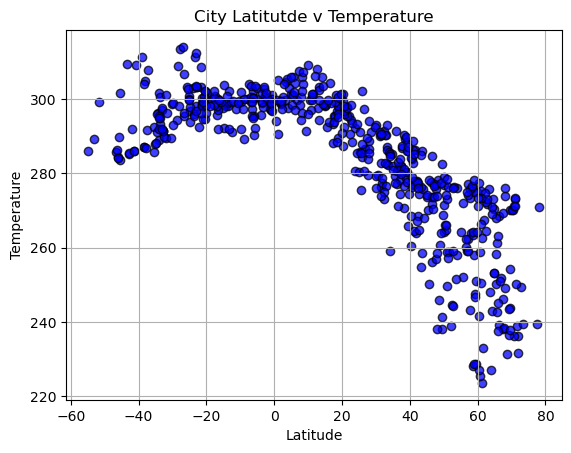

In [16]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
temp = city_data_df["Max Temp"]

plt.scatter(x_axis,temp, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude v Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# # Show plot
plt.show()

#### Latitude Vs. Humidity

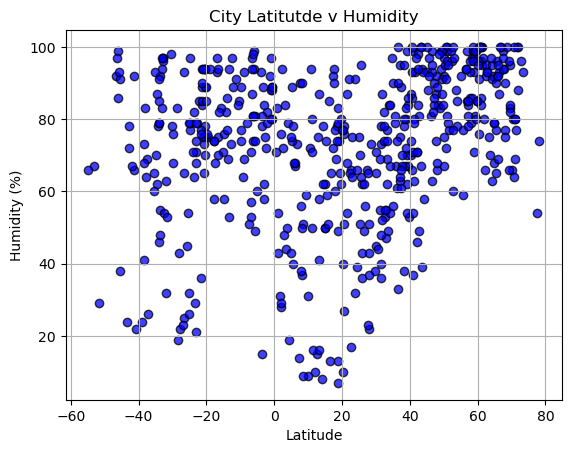

In [17]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
humid = city_data_df["Humidity"]

plt.scatter(x_axis,humid, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude v Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

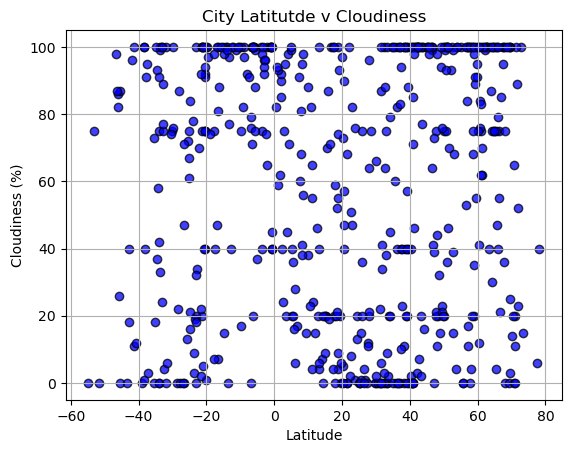

In [18]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
clouds = city_data_df["Cloudiness"]

plt.scatter(x_axis,clouds, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude v Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

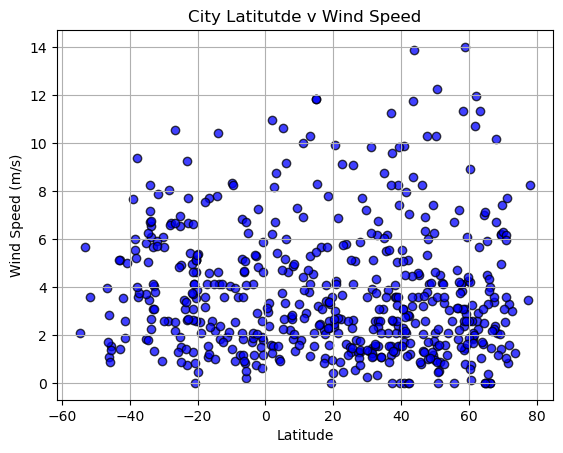

In [19]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
windy = city_data_df["Wind Speed"]

plt.scatter(x_axis,windy, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude v Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots

# independent = x_axis
# dependent = temp
# reg_slope, reg_int, reg_r, reg_p, reg_std_err = linregress(independent, temp)
# reg_fit = reg_slope * independent + reg_int
# reg_fit

# dependents = [
#     "temp": 
#     "humid",
#     "clouds",
#     "windy"
# ]

# regs = []

# def create_lr:

# for dependent in dependents:

#     reg_slope, reg_int, reg_r, reg_p, reg_std_err = linregress(independent, dependent)
#     reg_fit = reg_slope * independent + reg_int
#     regs.append(reg_fit)
    
# print(regs)


City_ID
0      265.020331
1      301.762465
2      269.013098
3      268.288298
4      311.555670
          ...    
542    284.145274
543    295.805234
544    292.253136
545    274.457461
546    263.915813
Name: Lat, Length: 547, dtype: float64

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vestmannaeyjar,63.4427,-20.2734,275.70,75,40,11.32,IS,1674146345
2,marienburg,54.0359,19.0266,275.95,78,100,3.02,PL,1674146110
3,thompson,55.7435,-97.8558,252.24,77,0,0.00,CA,1674145605
5,lyngseidet,69.5763,20.2189,270.15,83,25,6.22,NO,1674146347
11,saint george,37.1041,-113.5841,274.50,75,0,1.54,US,1674146235


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,rikitea,-23.1203,-134.9692,298.16,71,100,0.75,PF,1674145781
4,mataura,-46.1927,168.8643,284.51,99,86,1.06,NZ,1674145786
6,castro,-24.7911,-50.0119,296.68,77,84,1.51,BR,1674146347
7,coihaique,-45.5752,-72.0662,301.49,38,0,1.54,CL,1674146348
8,busselton,-33.6500,115.3333,293.33,55,33,6.53,AU,1674146348


###  Temperature vs. Latitude Linear Regression Plot

The r value is -0.84
The r value is -0.84


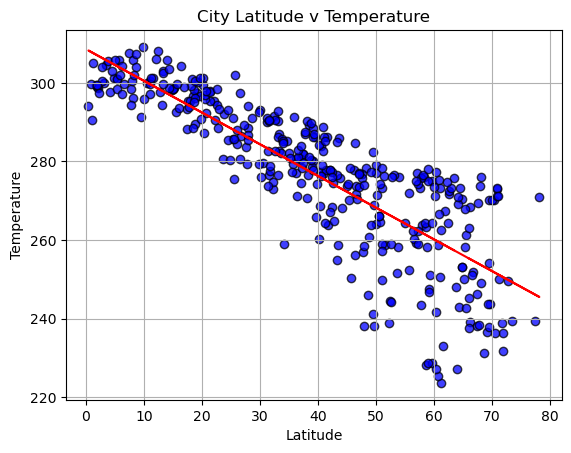

In [42]:
# Linear regression on Northern Hemisphere

# Build scatter plot for latitude vs. temperature
nh_lat = northern_hemi_df["Lat"]
nh_temp = northern_hemi_df["Max Temp"]

nh_slope, nh_int, nh_r, nh_p, nh_std_err = linregress(nh_lat, nh_temp)
nh_fit = nh_slope * nh_lat + nh_int

nh_line = "y = " + str(round(nh_slope,2)) + "x + " + str(round(nh_int,2))

print(f"The r value is {round(pearsonr(nh_lat,nh_temp)[0],2)}")
print(f"The r value is {round(nh_r,2)}")

plt.scatter(nh_lat,nh_temp, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(nh_lat, nh_fit, color = "red")

# Incorporate the other graph properties
plt.title("Northern Hemisphere City Latitude v Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()
plt.annotate(nh_line,(5.8,0.8),fontsize=15,color="red")


# Save the figure
plt.savefig("../output_data/Fig5.png")

# # Show plot
plt.show()

The r value is 0.36
The r value is 0.36


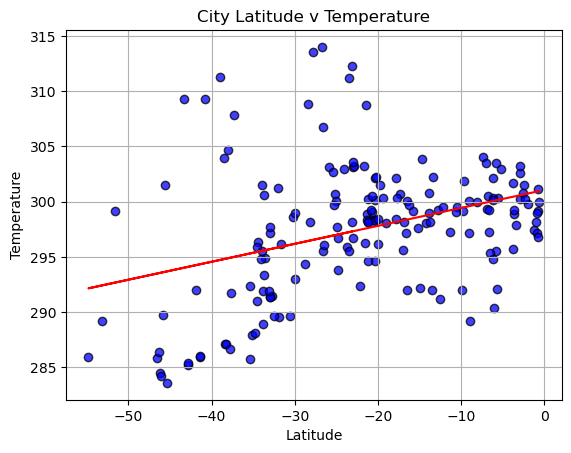

In [43]:
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. temperature
sh_lat = southern_hemi_df["Lat"]
sh_temp = southern_hemi_df["Max Temp"]

sh_slope, sh_int, sh_r, sh_p, sh_std_err = linregress(sh_lat, sh_temp)
sh_fit = sh_slope * sh_lat + sh_int

sh_line = "y = " + str(round(sh_slope,2)) + "x + " + str(round(sh_int,2))

print(f"The r value is {round(pearsonr(sh_lat,sh_temp)[0],2)}")
print(f"The r value is {round(sh_r,2)}")

plt.scatter(sh_lat,sh_temp, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(sh_lat, sh_fit, color = "red")

# Incorporate the other graph properties
plt.title("Southern Hemisphere City Latitude v Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()
plt.annotate(nh_line,(5.8,0.8),fontsize=15,color="red")


# Save the figure
plt.savefig("../output_data/Fig6.png")

# # Show plot
plt.show()

**Discussion about the linear relationship:** 

There is a strong negative correlation between latitude and temperature in the northern hemisphere. The further north you do, the lower the temperature. In the southern hemisphere, we see a weak positive correlation. This indicates that as we go north in the southern hemisphere the temperature rises. In both hemispheres, the temperature is higher the nearer you are to the equator.


### Humidity vs. Latitude Linear Regression Plot

The r value is 0.55
The r value is 0.55


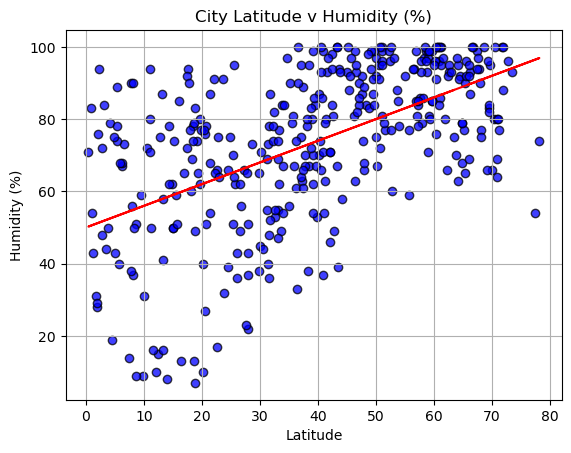

In [45]:
# Northern Hemisphere
# Build scatter plot for latitude vs. humidity
nh_lat = northern_hemi_df["Lat"]
nh_hum = northern_hemi_df["Humidity"]

nh_hum_slope, nh_hum_int, nh_hum_r, nh_hum_p, nh_hum_std_err = linregress(nh_lat, nh_hum)
nh_hum_fit = nh_hum_slope * nh_lat + nh_hum_int

nh_hum_line = "y = " + str(round(nh_hum_slope,2)) + "x + " + str(round(nh_hum_int,2))

print(f"The r value is {round(pearsonr(nh_lat,nh_hum)[0],2)}")
print(f"The r value is {round(nh_hum_r,2)}")

plt.scatter(nh_lat,nh_hum, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(nh_lat, nh_hum_fit, color = "red")

# Incorporate the other graph properties
plt.title("Northern Hemisphere City Latitude v Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.annotate(nh_line,(5.8,0.8),fontsize=15,color="red")


# Save the figure
plt.savefig("../output_data/Fig7.png")

# # Show plot
plt.show()

The r value is 0.21
The r value is 0.21


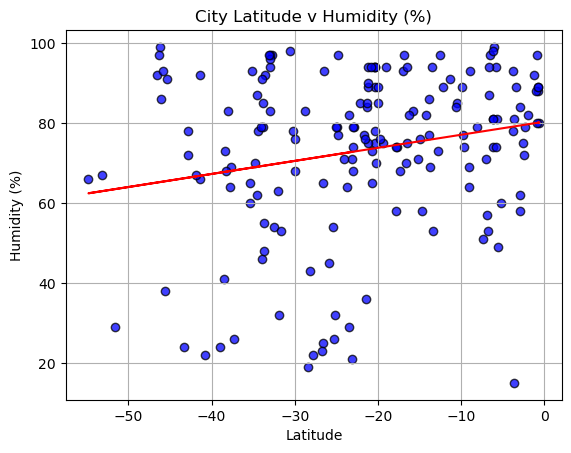

In [46]:
# Southern Hemisphere
# Build scatter plot for latitude vs. humidity
sh_lat = southern_hemi_df["Lat"]
sh_hum = southern_hemi_df["Humidity"]

sh_hum_slope, sh_hum_int, sh_hum_r, sh_hum_p, sh_hum_std_err = linregress(sh_lat, sh_hum)
sh_hum_fit = sh_hum_slope * sh_lat + sh_hum_int

sh_hum_line = "y = " + str(round(sh_hum_slope,2)) + "x + " + str(round(sh_hum_int,2))

print(f"The r value is {round(pearsonr(sh_lat,sh_hum)[0],2)}")
print(f"The r value is {round(sh_hum_r,2)}")

plt.scatter(sh_lat,sh_hum, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(sh_lat, sh_hum_fit, color = "red")

# Incorporate the other graph properties
plt.title("Southern Hemisphere City Latitude v Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.annotate(nh_line,(5.8,0.8),fontsize=15,color="red")


# Save the figure
plt.savefig("../output_data/Fig8.png")

# # Show plot
plt.show()

**Discussion about the linear relationship:** 

The northern hemisphere has a pretty strong positive correlation between latitude and humidity. As we go north in the northern hemisphere, we have higher values for humidity. 

The southern hemisphere also has a positive correlation between latitude and humidity, but it is weak. 

### Cloudiness vs. Latitude Linear Regression Plot

The r value is 0.2
The r value is 0.2


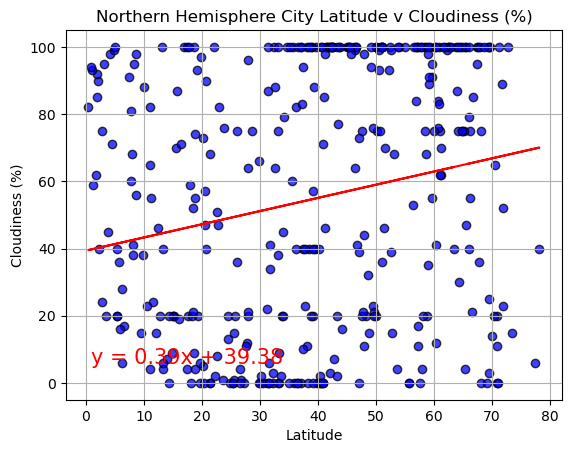

In [54]:
# Northern Hemisphere
# Build scatter plot for latitude vs. cloudiness
nh_lat = northern_hemi_df["Lat"]
nh_clouds = northern_hemi_df["Cloudiness"]

nh_clouds_slope, nh_clouds_int, nh_clouds_r, nh_clouds_p, nh_clouds_std_err = linregress(nh_lat, nh_clouds)
nh_clouds_fit = nh_clouds_slope * nh_lat + nh_clouds_int

nh_clouds_line = "y = " + str(round(nh_clouds_slope,2)) + "x + " + str(round(nh_clouds_int,2))

print(f"The r value is {round(pearsonr(nh_lat,nh_clouds)[0],2)}")
print(f"The r value is {round(nh_clouds_r,2)}")

plt.scatter(nh_lat,nh_clouds, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(nh_lat, nh_clouds_fit, color = "red")

# Incorporate the other graph properties
plt.title("Northern Hemisphere City Latitude v Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.annotate(nh_clouds_line,(0.8,5.8),fontsize=15,color="red")


# Save the figure
plt.savefig("../output_data/Fig9.png")

# # Show plot
plt.show()

The r value is 0.32
The r value is 0.32


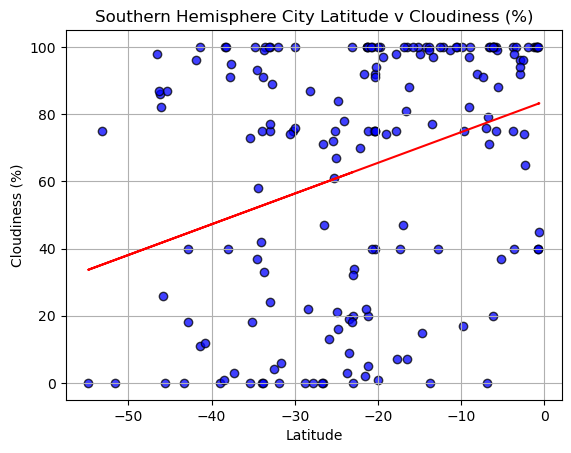

In [49]:
# Southern Hemisphere
# Build scatter plot for latitude vs. cloudiness
sh_lat = southern_hemi_df["Lat"]
sh_clouds = southern_hemi_df["Cloudiness"]

sh_clouds_slope, sh_clouds_int, sh_clouds_r, sh_clouds_p, sh_clouds_std_err = linregress(sh_lat, sh_clouds)
sh_clouds_fit = sh_clouds_slope * sh_lat + sh_clouds_int

sh_clouds_line = "y = " + str(round(sh_clouds_slope,2)) + "x + " + str(round(sh_clouds_int,2))

print(f"The r value is {round(pearsonr(sh_lat,sh_clouds)[0],2)}")
print(f"The r value is {round(sh_clouds_r,2)}")

plt.scatter(sh_lat,sh_clouds, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(sh_lat, sh_clouds_fit, color = "red")

# Incorporate the other graph properties
plt.title("Southern Hemisphere City Latitude v Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.annotate(sh_clouds_line,(5.8,0.8),fontsize=15,color="red")


# Save the figure
plt.savefig("../output_data/Fig10.png")

# # Show plot
plt.show()

**Discussion about the linear relationship:** 

Both the northern and southern hemispheres show weak positive correlations between latitude and cloudiness. This would indicates that the cloudiest places on the planet are around the north pole, and just south of the equator (the north of the southern hemisphere). 

### Wind Speed vs. Latitude Linear Regression Plot

The r value is -0.04
The r value is -0.04


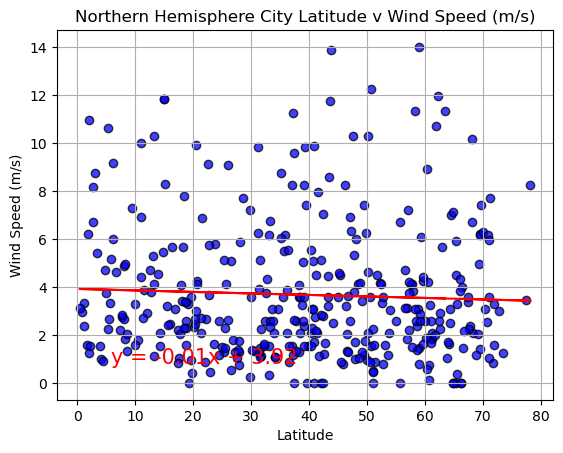

In [50]:
# Northern Hemisphere
# Build scatter plot for latitude vs. cloudiness
nh_lat = northern_hemi_df["Lat"]
nh_winds = northern_hemi_df["Wind Speed"]

nh_winds_slope, nh_winds_int, nh_winds_r, nh_winds_p, nh_winds_std_err = linregress(nh_lat, nh_winds)
nh_winds_fit = nh_winds_slope * nh_lat + nh_winds_int

nh_winds_line = "y = " + str(round(nh_winds_slope,2)) + "x + " + str(round(nh_winds_int,2))

print(f"The r value is {round(pearsonr(nh_lat,nh_winds)[0],2)}")
print(f"The r value is {round(nh_winds_r,2)}")

plt.scatter(nh_lat,nh_winds, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(nh_lat, nh_winds_fit, color = "red")

# Incorporate the other graph properties
plt.title("Northern Hemisphere City Latitude v Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
plt.annotate(nh_winds_line,(5.8,0.8),fontsize=15,color="red")


# Save the figure
plt.savefig("../output_data/Fig11.png")

# # Show plot
plt.show()

The r value is -0.14
The r value is -0.14


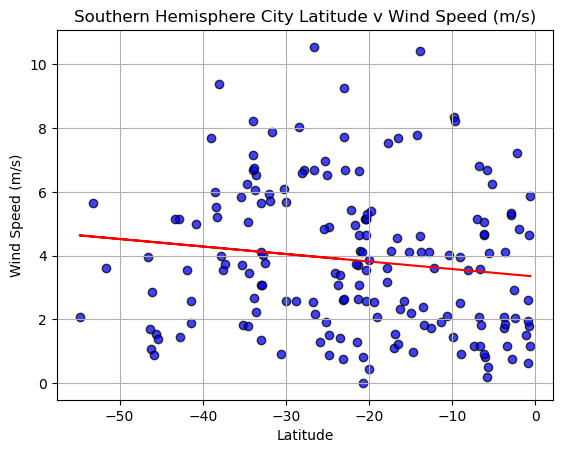

In [52]:
# Southern Hemisphere
sh_lat = southern_hemi_df["Lat"]
sh_winds = southern_hemi_df["Wind Speed"]

sh_winds_slope, sh_winds_int, sh_winds_r, sh_winds_p, sh_winds_std_err = linregress(sh_lat, sh_winds)
sh_winds_fit = sh_winds_slope * sh_lat + sh_winds_int

sh_winds_line = "y = " + str(round(sh_winds_slope,2)) + "x + " + str(round(sh_winds_int,2))

print(f"The r value is {round(pearsonr(sh_lat,sh_winds)[0],2)}")
print(f"The r value is {round(sh_winds_r,2)}")

plt.scatter(sh_lat,sh_winds, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(sh_lat, sh_winds_fit, color = "red")

# Incorporate the other graph properties
plt.title("Southern Hemisphere City Latitude v Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
plt.annotate(sh_winds_line,(5.8,0.8),fontsize=15,color="red")


# Save the figure
plt.savefig("../output_data/Fig12.png")

# # Show plot
plt.show()

**Discussion about the linear relationship:** 

There's a very weak negative correlation between latitude and wind speed in both hemispheres. This would indicate that we can expect it to be windy just above the equator and at the south pole. However, the correlation is so weak that we should just expect it to be windy just about anywhere. 